In [3]:
import sys
sys.path.append("../")

In [4]:
from preprocess_utils import get_unique_authors
from pathlib import Path

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from postprocessing_utils import postprocess_author, filter_author, is_human_author, preprocess_author, normalize
from preprocess_utils import load_jsonb

In [13]:
authors_per_server = {}
def filter_a(js):
    if js["author"] == None:
        return None
    js["author"] = [x for x in js["author"] if is_human_author(preprocess_author(x))]
    return js

for file in Path("../no_duplicates").iterdir():
    for js in load_jsonb(file):
        if js["author"] == None:
            continue
        server = js["server"]

        if server not in authors_per_server:
            authors_per_server[server] = set()
        

        for author in js["author"]:
            authors_per_server[server].add(author)

100%|██████████| 1628645/1628645 [01:15<00:00, 21444.61it/s]


In [14]:
print({k: len(v) for k, v in authors_per_server.items()})

{'idnes': 1, 'denik': 1, 'irozhlas': 2, 'novinky': 1, 'seznamzpravy': 1, 'aktualne': 2}


In [40]:
authors = list(authors)
for a in authors:
    print(a)

Indický Politik
Eleanor Mcclellandová
Veronika Tardonová Pro Téma
Svět Počítačů
Příběh Připravila Dana Jakoubková
Alena Řeznĺčková
Bytová Designérka
Ředitel Základní Školy
Heineken Česká Republika
Kancléř Uhk
Jana Skálová Tpa Horwath
Festival Otevřených Sklepů
Českomoravská Stavební Spořitelna
Stavební Spořitelny
Primátor Města Brna
Národní Politika Kvality
Hlavní Ekonom Deloitte Advisory
Johanna Grohová
Hejtman Karlovarského Kraje
Depozitní Centrum
Hypoteční Analytička Partners
Rozhovor Vedli Martina Buláková
Slovenský Spisovatel
Kdy Došly Prachy
Státní Fond Rozvoje Bydlení
Michaela Van Erne
Svátky Hudby
Hlavní Analytik Tradecentrum
Miroslav Mareš
Odborná Garantka Vím
Absolventka Soukromé Vysoké Školy
Abd Izospol Polná
Profesor Anglické Literatury
Doma Dnes
Filmová Dokumentaristka
Architektonické Studio Oooox
Hasiči Msk
Rwe Transgas
Filozofická Fakulta Univerzity Palackého
Metro Magazín
Upravil Jaroslav Špulák
Bývalý Poslanec Federálního Shromáždění
Petr Sedlický
Asociace Poskytovatel

In [5]:
author_folder = Path("../no_duplicates/")
authors_files = [x for x in author_folder.iterdir() if x.suffix == ".jsonb"]
authors = get_unique_authors(authors_files)


sorted_authors = sorted(authors.items(), key=lambda x: x[1], reverse=True)
print(len(sorted_authors))
print(sorted_authors[:100])

100%|██████████| 1628645/1628645 [01:15<00:00, 21524.02it/s]

10938
[('Milan Holakovský', 8628), ('Milan Kopp', 8501), ('Martin Hromádka', 7369), ('Marika Táborská', 6241), ('Stanislav Dvořák', 5469), ('Markéta Kaclová', 5149), ('Josef Kopecký', 4344), ('Libor Kopl', 4032), ('Štěpánka Saadouni', 3359), ('Jiří Hošek', 3133), ('Zdeněk Kellner', 3113), ('Martin Dorazín', 3028), ('Mirka Spáčilová', 3001), ('Václav Havránek', 2888), ('Daniela Tauberová', 2828), ('Petr Turek', 2812), ('Jan Charvát', 2791), ('Pavel Kortus', 2739), ('Jiří Kohout', 2737), ('Michal Burda', 2732), ('Jaroslav Špulák', 2729), ('Kateřina Nič Husárová', 2726), ('Edwin Otta', 2671), ('Jan Sůra', 2635), ('Roman Cichocki', 2511), ('Martin Vokurka', 2505), ('Michal Hrabal', 2458), ('Tomáš Januszek', 2448), ('Pavel Novák', 2430), ('Alexandr Vanžura', 2402), ('Lukáš Marek', 2356), ('František Kuba', 2331), ('Honza Srp', 2323), ('Kamil Dubský', 2292), ('Aleš Honus', 2284), ('Petr Krňávek', 2270), ('Jiří Seidl', 2265), ('Ivan Pavelek', 2265), ('Stanislav Kamenský', 2263), ('Iveta Nádvo

In [117]:
len(sorted_authors)

10938

In [119]:
len([auth for auth in authors.keys() if auth.endswith("á")])

4728

In [7]:
authors = dict()
author_folder = Path("../base")
authors_files = [x for x in author_folder.iterdir() if x.suffix == ".jsonb"]
authors = get_unique_authors(authors_files)


sorted_authors = sorted(authors.items(), key=lambda x: x[1], reverse=True)
print(len(sorted_authors))
print(sorted_authors[:100])

100%|██████████| 165798/165798 [00:09<00:00, 17733.33it/s]

27803
[('ČTK', 483833), ('Novinky', 285430), ('Redakce', 223264), ('Právo', 168196), ('iDNES.cz', 73222), ('externí', 35986), ('Milan Holakovský', 29123), ('Kateřina Perknerová', 14911), ('MF DNES', 14122), ('Libor Kopl', 13156), ('Sport', 12505), ('Aleš Vojíř', 11038), ('Jaroslav Krupka', 10688), ('Milan Kopp', 10619), ('Jiří Fejgl', 10483), ('Stanislav Dvořák', 10382), ('DPA', 9910), ('BBC', 9386), ('Luboš Palata', 9378), ('Seznam Zprávy', 9213), ('Petra Poláková-Uvírová', 8840), ('Vladimír Majer', 8694), ('Mirka Spáčilová', 8119), ('Martin Jůzek', 7897), ('Martin Hromádka', 7755), ('Pavel Kortus', 7700), ('Michal Hrabal', 7594), ('Jiří Janda', 7424), ('Filip Lukeš', 7382), ('aš', 6993), ('Rudolf Muzika', 6917), ('Martin Ruščin', 6909), ('Marika Táborská', 6898), ('Daniela Tauberová', 6805), ('Jaroslav Perdoch', 6760), ('Eliška Gáfriková', 6659), ('Luboš Kurzweil', 6611), ('Pavel Mikeš', 6555), ('mif', 6501), ('Milan Kilián', 6413), ('Famous', 6402), ('Markéta Kaclová', 6244), ('Jan 

In [118]:
len(sorted_authors)

10938

In [122]:
women = [x for x in authors.keys() if x.endswith("á")]
other = [x for x in authors.keys() if not x.endswith("á")]

In [123]:
with open("other.txt", "w") as f:
    for x in other:
        f.write(f"{x}\n")

In [ ]:
with open("women.txt", "w") as f:
    for x in women:
        f.write(f"{x}\n")

In [120]:
with open("authors.txt", "w") as f:
    for author, count in sorted_authors:
        f.write(f"{author}\n")

In [15]:
len(sorted_authors)

11283

In [6]:
import pandas as pd

In [5]:
df_all = pd.DataFrame(sorted_authors, columns=["author", "count"])

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

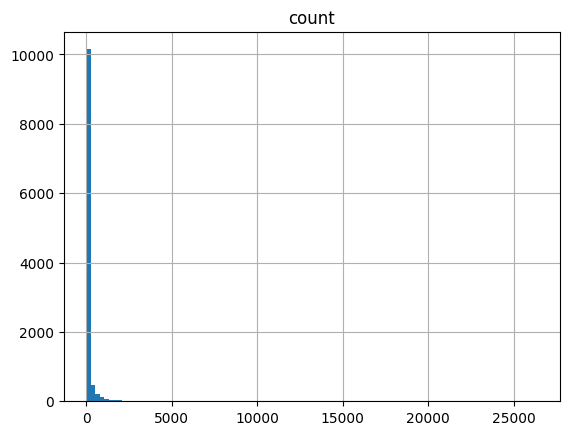

In [7]:
df_all.hist(column="count", bins=100)

In [3]:
from preprocess_utils import get_unique
genders = dict()
gender_folder = Path("final_dataset")
for file in gender_folder.iterdir():
    if file.is_file():
        genders = genders | get_unique(file, "author_genders")

100%|██████████| 1781963/1781963 [02:06<00:00, 14083.44it/s]


In [4]:
from proc
train = load_json("final_dataset/train.json")

{2: 463528, 1: 867690}